# COGS 108 - Final Project 

# Overview

My overall project is trying to see if the crime rate and park ratings in san diego are inversly related. This means that if one goes up then the other will go down. For example, more crime rate would imply lower park ratings and vice versa.  

# Name & GitHub ID

- Name: Cristian Jarquin
- GitHub Username: J-Cristian

# Research Question

How does the number of police reports near parks affect their yelp ratings? 

## Background and Prior Work

Ther first link is a map of where all of the san diego gangs reside. I found this to be a good indication as to where it may be more probable of police incidences. The map is sectioned out by blue areas you can click on to see what gangs territores areThe second link is a list of the top 10 worst neigboorhoods in san deigo. This site takes into consideration afforability, crime rate, safety, unemployment rate, population density, median income, etc. 

References (include links):
- 1)https://www.google.com/maps/d/u/0/viewer?msa=0&mid=1AzdtoinrSR7yMyK1dOdH9OkYLWc&ll=32.75914831142031%2C-117.20489505384519&z=11
- 2)https://www.roadsnacks.net/worst-neighborhoods-in-san-diego-ca/

# Hypothesis


I hypothesize that the crime rates and the park ratings are inversly related. 

# Dataset(s)

- Dataset Name: df_yelp_parks 
- Link to the dataset: https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_parks.csv
- Number of observations: (833, 10)

This dataset has 10 columns: 'name', 'address', 'phone', 'id', 'url', 'rating', 'review_count', 'longitude', 'latitude', 'is_closed'. This dataset has information on the name of each park, the average rating 1-5, the address of the parks, its coordinates and number of reviews made.  

- Dataset Name: df_pd_reports
- Link to the dataset: https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/pd_calls_for_service_2020_datasd.csv
- Number of observations: (522569, 14)

This has a lot of information on police reports although I will only be using a fraction of it. I plan on using the police beat which the associated neighborhood to the report and use dispotition describes the result of the call. For example, arrest, cancel, duplicate call, etc.  


I plan on using the general location not the specific addresses to combine the two datasets so I can have a count of the total number of police reports that resulted in arrests in that area and compare that witht he rating of the park in that specific area.  

# Setup

In [87]:
## YOUR CODE HERE
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
   
import seaborn as sns
sns.set()
sns.set_context('talk')

#import datasets
df_yelp_parks = pd.read_csv("https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_parks.csv")
df_pd_reports = pd.read_csv("https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/pd_calls_for_service_2020_datasd.csv")
df_beat = pd.read_csv('http://seshat.datasd.org/pd/pd_beat_neighborhoods_datasd.csv')

### Data Cleaning

Describe your data cleaning steps here.

In [88]:
drop_col = ['phone', 'id', 'url', 'review_count', 'longitude', 'latitude', 'address', 'is_closed']
df_yelp_parks = df_yelp_parks.drop(columns = drop_col) 
df_yelp_parks.columns
# I only need the park names and ratings to analyze the correlation so I dropped the rest of the columns
# I also kept the address column just in case I need to look up where a park 

Index(['name', 'rating'], dtype='object')

In [89]:
drop_col = ['incident_num', 'date_time', 'day_of_week', 'address_number_primary',
       'address_dir_primary', 'address_road_primary', 'address_sfx_primary',
       'address_dir_intersecting', 'address_road_intersecting',
       'address_sfx_intersecting', 'call_type',
       'priority']
df_pd_reports = df_pd_reports.drop(columns = drop_col)
df_pd_reports.columns
# Since I am looking for arrests and location I only need the beat nad dispotion columns
# i dropped the rest since i don't plan on using any of it

Index(['disposition', 'beat'], dtype='object')

In [90]:
# this depicts what these abriviations signify
# A--> ARREST MADE
# AB--> ARREST MADE, BOARD AND SECURE
# AHR--> ARREST MADE, HIGH RISK (CRISIS RESPONSE TEAM)

In [91]:
#  this code gets rid of all the rows that didn't result in an arrest
remove = [ 'K', 'W', 'DUP', 'CAN', 'O', 'U', 'R', 'X', 'S', 'RB', 'OHR', 'KHR', 'KB', 'V', 'RHR', 'DEF']
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[0] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[1] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[2] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[3] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[4] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[5] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[6] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[7] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[8] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[9] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[10] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[11] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[12] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[13] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[14] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['disposition'] == remove[15] )].index
df_pd_reports.drop(indexNames , inplace=True)
# this gets rid of any rows with missing data
df_pd_reports = df_pd_reports.dropna(axis=0, how='any')
# now we can take a look and see that only arrests are left
print(df_pd_reports['disposition'].unique())
print(df_pd_reports.shape)

['A' 'AHR' 'AB']
(19984, 2)


In [92]:
# this code below finds all the possible entries for beat(location) of both 
# the police reports and the the dictionary for which we have a meaning
df_pd_reports['beat'].unique()
pd_reports = [523, 315, 627, 122, 126, 116, 121, 524, 437, 834, 243, 811,  -1,
       936, 431, 521, 614, 836, 321, 451, 813, 623, 111, 721, 531, 712,
       622, 832, 713, 826, 541, 617, 113, 432, 114, 517, 441, 311, 123,
       625, 822, 436, 831, 828, 611, 234, 511, 835, 322, 839, 626, 933,
       527, 529, 512, 723, 833, 714, 624, 514, 821, 724, 447, 525, 323,
       124, 232, 522, 628, 442, 613, 246, 526, 115, 446, 837, 612, 444,
       242, 824, 314, 438, 528, 515, 313, 827, 621, 516, 445, 327, 838,
       934, 823, 324, 825, 841, 233, 725, 433, 518, 935, 722, 615, 241,
       814, 326, 443, 312, 812, 618, 931, 452, 245, 434, 112, 325, 932,
       231, 937, 316, 439, 616, 235, 711, 829,  55, 579, 100,  64,  54,
       673,  38, 130,  69,  62,  48,  28, 435]
len(n)
df_beat['Beat'].unique()
areas_with_arrests = [111, 112, 113, 114, 115, 116, 121, 122, 123, 124, 126, 231, 232,
       233, 234, 235, 241, 242, 243, 245, 246, 311, 312, 313, 314, 315,
       316, 321, 322, 323, 324, 325, 326, 327, 431, 432, 433, 434, 435,
       436, 437, 438, 439, 441, 442, 443, 444, 445, 446, 447, 451, 452,
       511, 512, 514, 515, 516, 517, 518, 521, 522, 523, 524, 525, 526,
       527, 528, 529, 531, 541, 611, 612, 613, 614, 615, 616, 617, 618,
       621, 622, 623, 624, 625, 626, 627, 628, 711, 712, 713, 714, 721,
       722, 723, 724, 725, 811, 812, 813, 814, 821, 822, 823, 824, 825,
       826, 827, 828, 829, 831, 832, 833, 834, 835, 836, 837, 838, 839,
       841, 931, 932, 933, 934, 935, 936, 937]
len(m)

# this finds all the values that are not in our dictionary(df_beat)  
remove = []
for i in range(len(pd_reports)):
    if pd_reports[i] not in areas_with_arrests:
        remove.append(pd_reports[i])
print(remove)


[-1, 55, 579, 100, 64, 54, 673, 38, 130, 69, 62, 48, 28]


In [93]:
# here we remove the values from the remove list above since we don't know the location associated with that beat value
indexNames = df_pd_reports[ (df_pd_reports['beat'] == remove[0] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['beat'] == remove[1] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['beat'] == remove[2] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['beat'] == remove[3] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['beat'] == remove[4] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['beat'] == remove[5] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['beat'] == remove[6] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['beat'] == remove[7] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['beat'] == remove[8] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['beat'] == remove[9] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['beat'] == remove[10] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['beat'] == remove[11] )].index
df_pd_reports.drop(indexNames , inplace=True)
indexNames = df_pd_reports[ (df_pd_reports['beat'] == remove[12] )].index
df_pd_reports.drop(indexNames , inplace=True)

df_pd_reports.shape


(19754, 2)

In [144]:
# here we find the sum of each beat to see the number of arrest withinthat beat(location) 
# note that I am only looking at four differnt places since I am on a time constraint
areas = ['Balboa Park', 'La Jolla', 'Emerald Hills' ,'Border'] 
arrests = []

details = df_pd_reports.apply(lambda x : True
            if x['beat'] == 531 else False, axis = 1)
num_rows = len(details[details == True].index) 
print('Balboa Park has had' ,num_rows, 'arrests')
arrests.append(num_rows)

details = df_pd_reports.apply(lambda x : True
            if x['beat'] == 124 else False, axis = 1)
num_rows = len(details[details == True].index) 
print('La Jolla has had' ,num_rows, 'arrests')
arrests.append(num_rows)

details = df_pd_reports.apply(lambda x : True
            if x['beat'] == 431 else False, axis = 1)
num_rows = len(details[details == True].index) 
print('Emerald Hills has had' ,num_rows, 'arrests')
arrests.append(num_rows)

details = df_pd_reports.apply(lambda x : True
            if x['beat'] == 714 else False, axis = 1)
num_rows = len(details[details == True].index) 
print('Border has had' ,num_rows, 'arrests')
arrests.append(num_rows)

print(arrests)

Balboa Park has had 247 arrests
La Jolla has had 206 arrests
Emerald Hills has had 59 arrests
Border has had 75 arrests
[247, 206, 59, 75]


In [156]:
areas = ['Balboa Park', 'La Jolla', 'Emerald Hills Park' ,'San Ysidro Port of Entry']  
df_yelp_parks.set_index(df_yelp_parks.name,inplace=True)
print(df_yelp_parks.loc[areas].reset_index(drop=True))

ratings = [5.0, 4.5, 3.5, 3.0]

                       name  rating
0               Balboa Park     5.0
1                  La Jolla     4.5
2        Emerald Hills Park     3.5
3  San Ysidro Port of Entry     3.0


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

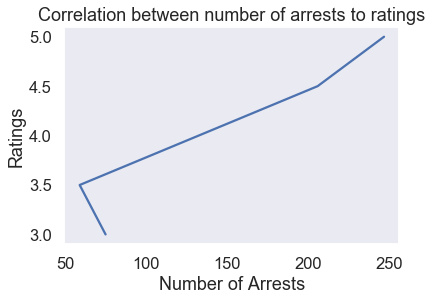

In [164]:
plt.plot(arrests, ratings)
plt.xlabel('Number of Arrests')
plt.ylabel('Ratings')
plt.title('Correlation between number of arrests to ratings')
plt.grid(False)
plt.show()

In [ ]:
# Analysis: I think I may have not had enough data to get something meaningful from my graph.
# There may be a high crime rate at te border since there is a higher traffic of people in this area
# other areas like emerald hills has a high gang activity but there was a lower number of arrest 
# compared to areas like balboa park. 

# Ethics & Privacy

I can see that removing a lot of the data from the df_pd_reports plays an important role in eithics and privacy. It is important because people might be able to identify someone by the date time and location data and see what the result was for their intereaction with the police since it gives the dispotion. This is definaly an invasion of privacy since people may not want others to know what happened. 

# Conclusion & Discussion

to conclude I found that number of arrests and yelp ratings are not inversly realted but maybe directly related. I found the graph very suprsing since I figured crime rate will affect people rating but I failed to consider the differnt topics they my be inouting their rating for. For example, the border may have the highest arrest but people might be basing thier reviews on the how ,uch they like to travel to Mexico. I may have made a too big of an overgrealization by only choosing four different data entries. I will come back and try to plot more entries on and see if the graph chnages in any way. I also wish I had more time to clean up my graph by maybe making the background white and try a differnt plot to see if it is easier to read. 